# XOR Prototype in Keras

In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [42]:
# Data preparation
# - Define dataset for training (features and labels)
# - Define a test set which is the same as the train set
X_train = X_test = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
y_train = y_test = np.array([[0],[1],[1],[0]], "float32")


## Basline: One hidden layer (dense) with 16 neurons and a Relu activation

The baseline model consists of one hidden layer which is dense with 16 neurons and a rectified linear unit as activation function. Furthermore, the input dimension is $input\_dim=2$ because each sample has two dimensions. The output layer consists of another dense layer with one neuron activated using a sigmoid activation functions. The range of the output is between $[0,1]$ indicating the probability to which class the output belongs to. 

The model is fitted using the `binary_cross_entropy` as a loss function and the `adam` optimizer. As a evaluation metric we use the accuracy which is defined as follows

$$Accuracy = \frac{TP + TN}{TP+TN + FP +FN}$$

The model is fitted using 200 epochs. In the end, a classification report shows the overall accuracy among some other metrics. Furthermore, the accuracy over the epochs is visualized to check how many iterations are needed to get a good accuracy. 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



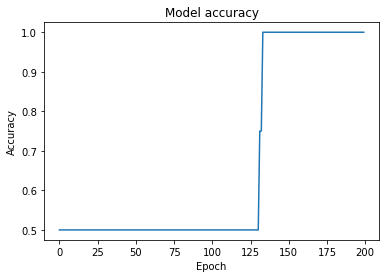

In [55]:
# Create the neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit model on training data
model.fit(X_train, y_train, epochs=200, verbose=0)

# Make predictions
y_pred = model.predict(X_test).round()
print(classification_report(y_test, y_pred))

plt.plot(model.history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


## Increasing the number of neurons in the hidden layer to 32

By increasing the number of neurons in the hidden layer to 32 allows the network to learn more features from the input data. However, if we increase the number of neurons too much, the model might learn features that are completely irrelevant. So in fact, the model should be kept as small as possible

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



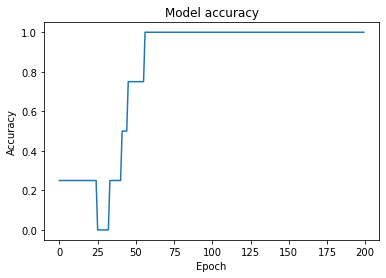

In [52]:
# Create the neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit model on training data
model.fit(X_train, y_train, epochs=200, verbose=0)

# Make predictions
y_pred = model.predict(X_test).round()
print(classification_report(y_test, y_pred))

plt.plot(model.history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


## Adding a second hidden layer with 32 neurons

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



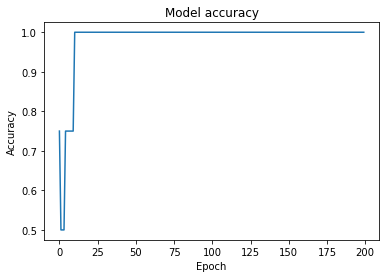

In [54]:
# Create the neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit model on training data
model.fit(X_train, y_train, epochs=200, verbose=0)

# Make predictions
y_pred = model.predict(X_test).round()
print(classification_report(y_test, y_pred))

plt.plot(model.history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
